In [2]:
import pandas as pd
import numpy as np

In [3]:
#数据集路径
data_file='all_comments.csv'
data_df=pd.read_csv(data_file)

In [4]:
data_df.head()

,user_id,city,rating,date,comment
0,天是红河岸,上海,力荐,2019-06-27,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。
1,回南雀,湖北武汉,力荐,2019-06-27,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...
2,西年,河北邯郸,推荐,2019-06-27,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...
3,宇宙飛行士.,北京,力荐,2019-06-27,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...
4,吹哥,湖北仙桃,推荐,2019-06-27,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...


In [5]:
data_df=pd.read_csv(data_file,usecols=['city','rating','date','comment'])

In [6]:
#数据预览
data_df.head()

,city,rating,date,comment
0,上海,力荐,2019-06-27,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。
1,湖北武汉,力荐,2019-06-27,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...
2,河北邯郸,推荐,2019-06-27,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...
3,北京,力荐,2019-06-27,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...
4,湖北仙桃,推荐,2019-06-27,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...


In [7]:
#查看数据的行数和列数
data_df.shape

(500, 4)

In [8]:
#查看数据集的基本信息
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     327 non-null    object
 1   rating   500 non-null    object
 2   date     500 non-null    object
 3   comment  500 non-null    object
dtypes: object(4)
memory usage: 15.8+ KB


In [9]:
#数据初步处理


In [10]:
#日期数据类型处理

In [11]:
data_df['date']

0      2019-06-27
1      2019-06-27
2      2019-06-27
3      2019-06-27
4      2019-06-27
          ...    
495    2019-07-19
496    2019-07-23
497    2019-06-29
498    2019-07-19
499    2019-07-20
Name: date, Length: 500, dtype: object

In [12]:
data_df['date']=pd.to_datetime(data_df['date'])

In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   city     327 non-null    object        
 1   rating   500 non-null    object        
 2   date     500 non-null    datetime64[ns]
 3   comment  500 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 15.8+ KB


In [14]:
print("评论的开始日期",data_df['date'].min())

评论的开始日期 2019-06-27 00:00:00


In [15]:
print("评论的结束日期",data_df['date'].max())

评论的结束日期 2019-09-15 00:00:00


In [16]:
#评分处理
rating_dict={
    '很差':1,
    '较差':2,
    '还行':3,
    '推荐':4,
    '力荐':5
}

In [17]:
data_df['score']=data_df['rating'].map(rating_dict)

In [18]:
data_df.head()

,city,rating,date,comment,score
0,上海,力荐,2019-06-27,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。,5
1,湖北武汉,力荐,2019-06-27,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...,5
2,河北邯郸,推荐,2019-06-27,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...,4
3,北京,力荐,2019-06-27,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...,5
4,湖北仙桃,推荐,2019-06-27,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...,4


In [19]:
#数据分析
#整体平价

In [20]:
#统计各项平分的个数
rating_results=data_df.groupby('rating').size()
rating_results

rating
力荐    238
很差    143
推荐     51
较差     60
还行      8
dtype: int64

In [21]:
#在爬取的500条评论中，大多数给了5分的好评，然后是1分的差评，两级分化比较严重

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36739 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-package

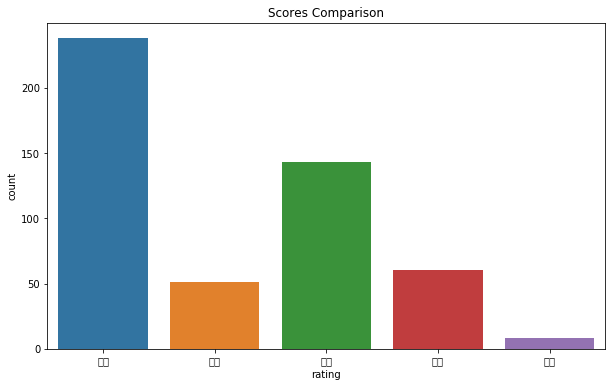

In [22]:
#可视化各项评分的个数
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,6))
sns.countplot(x='rating',data=data_df)
plt.title('Scores Comparison')
plt.show()


In [23]:
import matplotlib.pyplot as plt


In [24]:
#使用pyecharts
#柱状图


In [25]:
from pyecharts.charts import Bar

bar=Bar()
bar.add_xaxis(rating_results.index.to_list())
bar.add_yaxis('总体评价',rating_results.to_list())
bar.render_notebook()

In [26]:
#饼状图
from pyecharts.charts import Pie

data_pair=list(zip(rating_results.index.to_list(),rating_results.tolist()))

pie=Pie()
pie.add('总体评价',data_pair)
pie.render_notebook()

In [27]:
#分析不同月份的评价趋势
#将日期设置为索引

data_df.set_index('date',inplace=True)
data_df.head()

,city,rating,comment,score
date,,,,
2019-06-27,上海,力荐,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。,5
2019-06-27,湖北武汉,力荐,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...,5
2019-06-27,河北邯郸,推荐,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...,4
2019-06-27,北京,力荐,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...,5
2019-06-27,湖北仙桃,推荐,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...,4


In [28]:
#使用resmaple进行统计
score_trend=data_df.resample('M').agg({'score':'mean','comment':'count'})
score_trend

,score,comment
date,,
2019-06-30,3.395018,281
2019-07-31,3.111702,188
2019-08-31,1.750000,4
2019-09-30,5.000000,27


In [29]:
from pyecharts.charts import Line
line=Line()
line.add_xaxis(score_trend.index.to_list())
line.add_yaxis("评分",score_trend['score'].to_list())
line.render_notebook()

In [30]:
#情感分析

In [31]:
#使用snowNLP进行情感分析
from snownlp import SnowNLP

In [32]:
#情感分析例子
text=SnowNLP('这个产品很好用，这个产品是垃圾，这个也太难看了。')
sent=text.sentences
for sen in sent:
    s=SnowNLP(sen)
    print(s.sentiments)

0.7853504415636449
0.13082804652201174
0.15877229730613918


In [33]:
#越接近0表示负面情绪
#越接近1表示正面情绪

In [34]:
#获取文本的情感打分
np.mean([SnowNLP(sen).sentiments for sen in sent])

0.358316928463932

In [35]:
def get_sentiment_score(comment):
    
    """
    获取评论的情感分数
    """
    #分句
    sents=SnowNLP(comment).sentences
    sentiment_score=np.mean([SnowNLP(sent).sentiments for sent in sents])
    return sentiment_score
    

In [36]:
#对每条评论进行情感分析
data_df['sentiment_score']=data_df['comment'].map(get_sentiment_score)

In [37]:
#查看结果
data_df.head()

,city,rating,comment,score,sentiment_score
date,,,,,
2019-06-27,上海,力荐,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。,5,0.879484
2019-06-27,湖北武汉,力荐,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...,5,0.743536
2019-06-27,河北邯郸,推荐,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...,4,0.643607
2019-06-27,北京,力荐,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...,5,0.754841
2019-06-27,湖北仙桃,推荐,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...,4,0.760200


In [38]:
#查看情感分数的分布情况
# plt.figure(figsize=(10,6))
# sns.distplot(data_df['sentiment_score'],kde=False)
# plt.title('Sentiment Score Distributtion')
# plt.show()

In [39]:
#评论数地区分布
import cpca

In [40]:
#例子
cpca.transform(['吉林省榆树市','朝阳区中关村'])


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\李强\AppData\Local\Temp\jieba.cache
Loading model cost 1.169 seconds.
Prefix dict has been built succesfully.


,省,市,区,地址
0,吉林省,长春市,榆树市,
1,北京市,北京市,朝阳区,中关村


In [41]:
#获取城市
cpca.transform(['朝阳区中关村']).loc[0,'市'][:-1]

'北京'

In [42]:
def get_valid_city(city_str):
    try:
        return cpca.transform([city_str]).loc[0,'市'][:-1]
    except:
        pass

In [43]:
print(get_valid_city("上海"))

上海


In [44]:
cpca.transform(["湖北武汉"]).loc[0,'市'][:-1]

'武汉'

In [45]:
data_df['valid_city']=data_df['city'].map(get_valid_city)

In [46]:
#查看结果
data_df.head()

,city,rating,comment,score,sentiment_score,valid_city
date,,,,,,
2019-06-27,上海,力荐,打光摄影服化道都用心，曹盾的画面一如既往靠谱，质感太棒了！应该是本年度最佳古装了。,5,0.879484,上海
2019-06-27,湖北武汉,力荐,电影质感，镜头转换非常流畅。服化道非常精致。全员原音，感觉很棒！雷佳音扮演的死囚张小敬很不羁...,5,0.743536,武汉
2019-06-27,河北邯郸,推荐,唐朝只有道士的簪子是竖着插，很少有剧组会注意到这点，所以这部剧的道具是真的用心，下了功夫研究...,4,0.643607,邯郸
2019-06-27,北京,力荐,服化道、配乐、摄影、打光、整片电影质感都绝了，开头的一镜到底真是盛世长安啊！剧组在细节上的处...,5,0.754841,北京
2019-06-27,湖北仙桃,推荐,期待这部剧很久了，感觉唐朝的还原度非常高，装饰的道具都很真实。剧中人物的服装非常精致，就是漂...,4,0.760200,


In [47]:
#获取每个城市的评论统计信息
comment_city_results=data_df.groupby('valid_city').agg({
    'score':'mean','comment':'count'
})

In [48]:
comment_city_results.head(10)

,score,comment
valid_city,,
,3.294118,51
上海,3.216216,37
乌海,1.000000,1
九江,5.000000,1
北京,3.323944,71
南京,3.428571,7
南充,5.000000,1
南昌,3.000000,2
南通,1.000000,1


In [49]:
#pyecharts
import pyecharts
supported_places=pyecharts.datasets.COORDINATES.keys()
supported_places

dict_keys(['阿城', '阿克苏', '阿勒泰', '阿图什', '安达', '安国', '安康', '安陆', '安庆', '安丘', '安顺', '安阳', '鞍山', '巴中', '霸州', '白城', '白山', '白银', '百色', '蚌埠', '包头', '宝鸡', '保定', '保山', '北海', '北流', '北票', '本溪', '毕节', '滨州', '亳州', '博乐', '沧州', '昌吉', '昌邑', '常德', '常熟', '常州', '巢湖', '朝阳', '潮阳', '潮州', '郴州', '成都', '承德', '澄海', '赤峰', '赤水', '崇州', '滁州', '楚雄', '慈溪', '从化', '达川', '大安', '大理', '大连', '大庆', '大石桥', '大同', '大冶', '丹东', '丹江口', '丹阳', '儋州', '当阳', '德惠', '德令哈', '德兴', '德阳', '德州', '登封', '邓州', '定州', '东川', '东港', '东莞', '东胜', '东台', '东阳', '东营', '都江堰', '都匀', '敦化', '敦煌', '峨眉山', '额尔古纳', '鄂尔多斯', '鄂州', '恩平', '恩施', '二连浩特', '番禺', '防城港', '肥城', '丰城', '丰南', '丰镇', '凤城', '奉化', '佛山', '涪陵', '福安', '福清', '福州', '抚顺', '阜康', '阜新', '阜阳', '富锦', '富阳', '盖州', '赣州', '高安', '高碑店', '高密', '高明', '高平', '高要', '高邮', '高州', '格尔木', '个旧', '根河', '公主岭', '巩义', '古交', '广汉', '广水', '广元', '广州', '贵池', '贵港', '贵阳', '桂林', '桂平', '哈尔滨', '哈密', '海城', '海口', '海拉尔', '海林', '海伦', '海门', '海宁', '邯郸', '韩城', '汉中', '杭州', '蒿城', '合川', '合肥', '合山', '和龙', '和田', '河池', '河间', '河津', '河源', '菏泽', '鹤壁', '鹤岗

In [50]:
#过滤分析结果
supported_com_city_results=comment_city_results[comment_city_results.index.isin(supported_places)]

In [51]:
#对结果进行排序
final_city_results=supported_com_city_results.sort_values(by='comment',ascending=False)


In [52]:
final_city_results

,score,comment
valid_city,,
北京,3.323944,71
上海,3.216216,37
杭州,3.200000,15
广州,3.666667,15
成都,3.000000,14
武汉,2.833333,12
长沙,4.625000,8
深圳,4.285714,7
南京,3.428571,7


In [53]:
#使用柱状图查看结果
bar=Bar()
bar.add_xaxis(final_city_results.index.tolist())
bar.add_yaxis('城市评论数',final_city_results['comment'].tolist())
bar.render_notebook()

In [54]:
#使用地图查看分析结果
from pyecharts.charts import Geo
from pyecharts.globals import ChartType
from pyecharts import options as opts

def geo_heatmap():
    c=(
        Geo().add_schema(maptype="china").add("评论地图",list(zip(supported_com_city_results.index.to_list(),
                                                             supported_com_city_results['comment'].to_list())),
                                             #type_=ChartType.HEATMAP#热图
                                             type_=ChartType.EFFECT_SCATTER,#散点图
                                              
                                             ).set_series_opts(label_opts=opts.LabelOpts(is_show=False))
        
        .set_global_opts(
        
        visualmap_opts=opts.VisualMapOpts(),
            title_opts=opts.TitleOpts(title="评论数"),
        )
        
    
    )

    return c

In [55]:
geo_heatmap().render_notebook()

In [56]:
#评论词云分析


In [57]:
import jieba

In [58]:
#中文分词例子


In [59]:
sen="画面精良，剧情紧凑，千玺弟弟第一次挑大梁的戏的确也可圈可点，戏中各个老戏骨更是稳稳的演技，长安十二时辰，值得五星！姚汝能，给我刚起来吧，别怂了！崔器都死了"
' '.join(jieba.cut(sen))

'画面 精良 ， 剧情 紧凑 ， 千玺 弟弟 第一次 挑大梁 的 戏 的确 也 可圈可点 ， 戏中 各个 老戏骨 更是 稳稳 的 演技 ， 长安 十二 时辰 ， 值得 五星 ！ 姚汝能 ， 给 我 刚 起来 吧 ， 别 怂 了 ！ 崔器 都 死 了'

In [60]:
#对每条评论进行分析
data_df['words']=data_df['comment'].map(lambda c:' '.join(jieba.cut(c)))

In [61]:
#合并所有的分词结果
all_words=data_df['words'].str.cat()

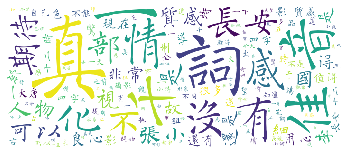

In [62]:
#词云绘制
from wordcloud import WordCloud

background_image=plt.imread('1.jpg')#读取背景图片
wc=WordCloud(width=1000,height=800,background_color='white',
            mask=background_image,
            max_font_size=200,
             font_path='HYC5GFM.TTF'
            )
wc.generate_from_text(all_words)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('changan.jpg')